Данная статья посвящена анализу работы байесовской оптимизации. В качестве фреймворка использовалась библиотека GPyOpt (https://github.com/SheffieldML/GPyOpt). Анализ проводился для функций зашумленных 2 видами шума: гомоскедастичным и гетероскедастичным (для гетероскедастичной модели уровень шума квадратично зависил от координаты).
Сравнение проводилось по двум параметрам: количество попаданий в $\varepsilon$ - окрестность точки минимума и относительная ошибка значений целевой функции на точках оптимума, найденных в результате оптимизации. Как уже было сказанно выше, для всех функций, представленных ниже, байесовская оптимизация была запущена 50 раз для двух разных случаев: 
$$$$1) целевая фунция была зашумлена гомоскедастичным шумом
$$$$2) целевая функция была зашумлена гетероскедастичным шумом
$$$$ Уровень шума подбирался таким образом чтобы значение дисперсии на отрезке, на котором происходит  оптимизация были примерно одинаковами для двух моделей, то есть, если   $V_1(f(x), g_1(x)) = E int_{x \in [a, b]} (g_1(x) - f(x))^2$ , а $ V_2(f(x), g_2(x)) = E int_{x \in [a, b]} (g_2(x) - f(x))^2$, где $g_1, g_2$ - зашумленные функции, а $[a, b]$ - отрезок, накотором происходит оптимизация,  то $V_1 = V_2$

In [7]:
%pylab inline  
import GPy
import GPyOpt
import numpy as np
import  Functions
from Functions import *

Populating the interactive namespace from numpy and matplotlib


Первая функция

variance_hm =  16459.185522232685
variance_ht =   16508.507553051182


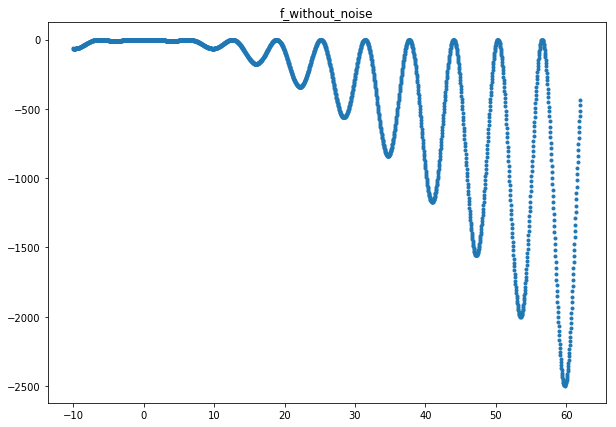

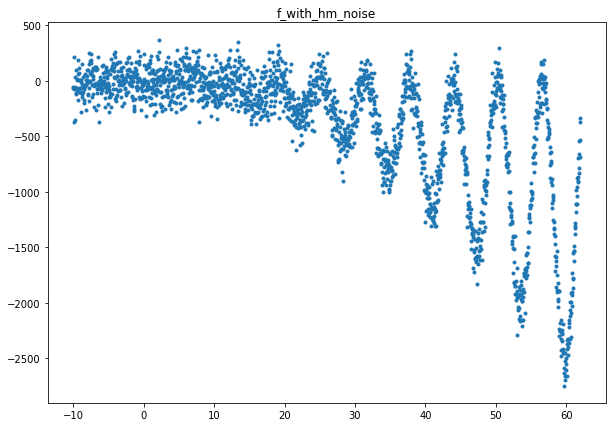

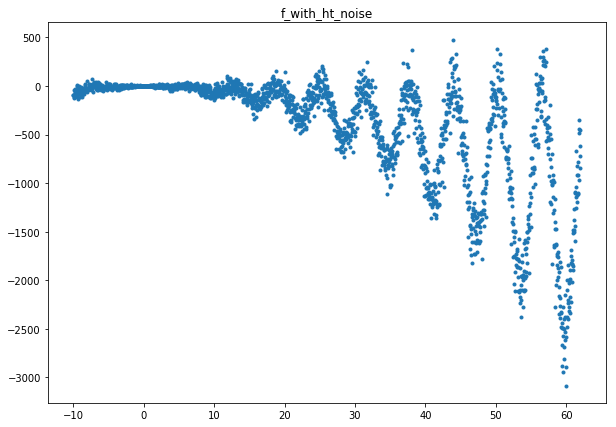

In [15]:
def f (x): 
    return - 0.7 * np.sin(0.5 * x) **2 * x**2

def f_without_noise(X):
    return f (X)
    
    #second function - without homo noise  
def f_with_hm_noise(X):
    return f(X) + np.random.normal(loc=0.0, scale=128, size=(X.shape[0], 1)).reshape(-1, )        

    #third function
def f_with_ht_noise(X):
         #target function  + heteroscadastic noise
    return f (X)  + \
        4 * np.random.multivariate_normal(np.zeros(X.reshape(-1, ).shape[0]), np.diag(abs (X.reshape (-1, ))**2), 1)[0]        

N = 2000
X = np.linspace(-10,  62, N)
V1 = np.array (f_with_hm_noise (X) - f_without_noise (X))
V2 = np.array (f_with_ht_noise (X) - f_without_noise (X))
V1 = V1 **2
V2 = V2 **2

print 'variance_hm = ',  V1.mean()
print 'variance_ht =  ', V2.mean()





y = f_without_noise(X)
pyplot.figure(figsize = (10, 7))
pyplot.title("f_without_noise")
pyplot.plot(X, y, '.')

y = f_with_hm_noise(X)
pyplot.figure(figsize = (10, 7))
pyplot.title("f_with_hm_noise")
pyplot.plot(X, y, '.')
    

y = f_with_ht_noise(X)
pyplot.figure(figsize = (10, 7))
pyplot.title("f_with_ht_noise")
pyplot.plot(X, y, '.')


Минимум данной функции находится в точке $x_\min = 59.8$. Было полученно, что при оптимизации количество попаданий в промежуток (56.5, 62.5), то есть с точностью  95%, в гомоскедастичной модели составило 27 из 50 (54%) , в гетероскедастичной модели 22 из 50 (44%).    

    Среднее значение и дисперсия целевой функции на точках полученных в результате оптимизации  для двух моделей:
    hm_noise
    mean:  -1900.9049064832789 variance:  466270.77139905223
    ht_noise
    mean:  -1850.768427843144 variance:  333048.1391384283 
    Значение целевой функции в минимуме:
    -2495.699106879998
    


Вторая функция

variance_hm =  0.012553893777152839
variance_ht =   0.015026732689750298


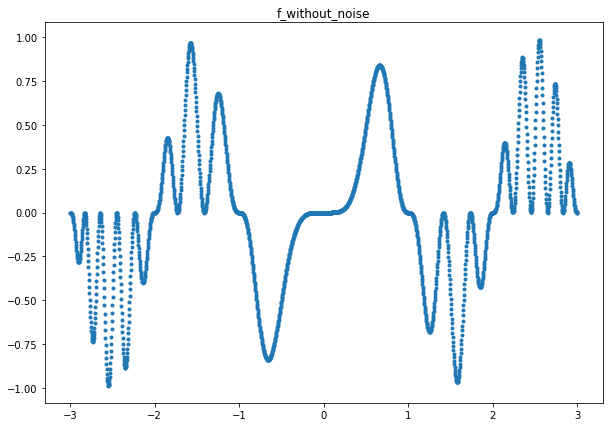

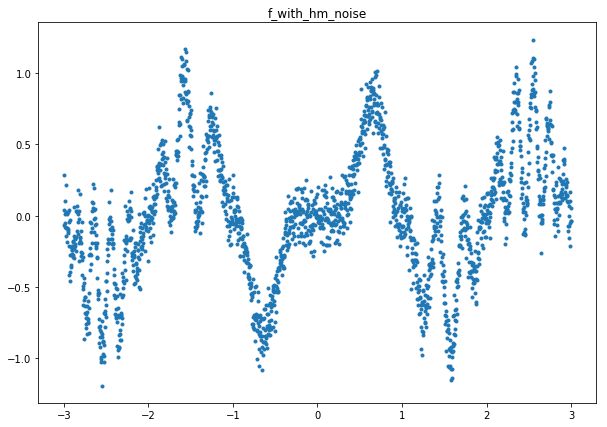

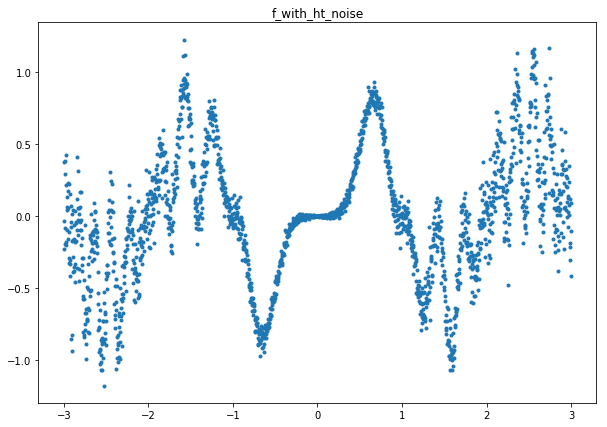

In [28]:
def f_without_noise(X):
    return functionDoESpecial (X, 'sqmichalewicz5')
    #second function - without homo noise  
def f_with_hm_noise(X):
    return functionDoESpecial (X, 'sqmichalewicz5') + np.random.normal(loc=0.0, scale=0.11, size=(X.shape[0], 1)).reshape (-1, )        
        #third function
def f_with_ht_noise(X):
         #target function  + heteroscadastic noise
    return functionDoESpecial (X, 'sqmichalewicz5')  + \
        0.07 * np.random.multivariate_normal(np.zeros(X.reshape(-1, ).shape[0]), np.diag(abs (X.reshape (-1, ))**2), 1)[0]        



N = 2000
X = np.linspace(-3, 3, N).reshape (-1, 1)
V1 = np.array (f_with_hm_noise (X) - f_without_noise (X))
V2 = np.array (f_with_ht_noise (X) - f_without_noise (X))
V1 = V1 **2
V2 = V2 **2

print 'variance_hm = ',  V1.mean()
print 'variance_ht =  ', V2.mean()


y = f_without_noise(X)
pyplot.figure(figsize = (10, 7))
pyplot.title("f_without_noise")
pyplot.plot(X, y, '.')

y = f_with_hm_noise(X)
pyplot.figure(figsize = (10, 7))
pyplot.title("f_with_hm_noise")
pyplot.plot(X, y, '.')
    
y = f_with_ht_noise(X)
pyplot.figure(figsize = (10, 7))
pyplot.title("f_with_ht_noise")
pyplot.plot(X, y, '.')

Минимум данной функции находится в точке $x_\min = -2.549$. Было полученно, что при оптимизации количество попаданий в промежуток (-2.67, -2.42), то есть с точностью  95%, в гомоскедастичной модели составило 7 из 50 (14%) , в гетероскедастичной модели 9 из 50 (18%).    

    Среднее значение и дисперсия целевой функции на точках полученных в результате оптимизации  для двух моделей:
    y_with_hm_noise
    mean:  -0.8598164376490536 variance:  0.008034271355137316
    y_with_ht_noise
    mean:  -0.8741112258299202 variance:  0.017175058684454698 
    Значение целевой функции в минимуме:
    -0.98778659
    


Таким образом гомоскедастичная модель показала себя хуже гетероскедастичной модели.

Третья функция

variance_hm =  0.014054554371141108
variance_ht =   0.01494902710089693


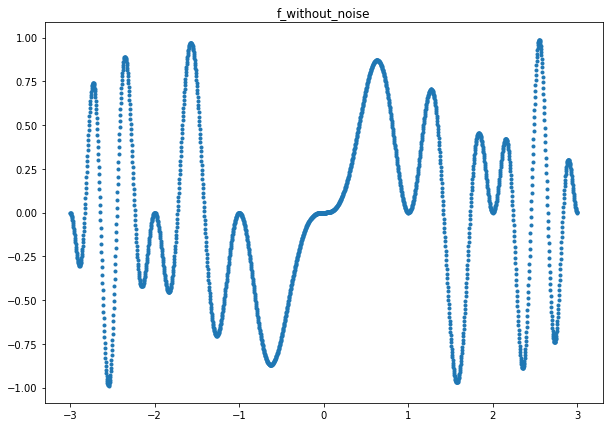

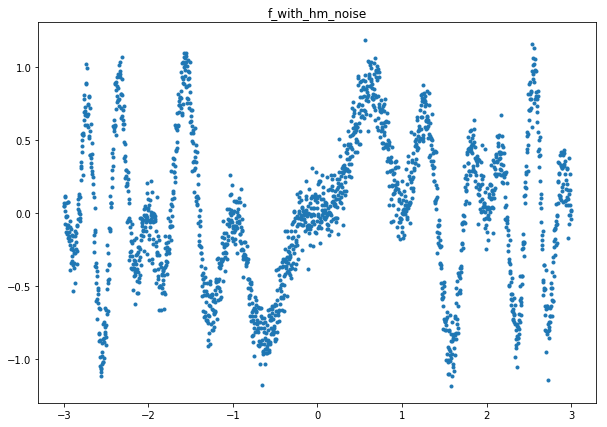

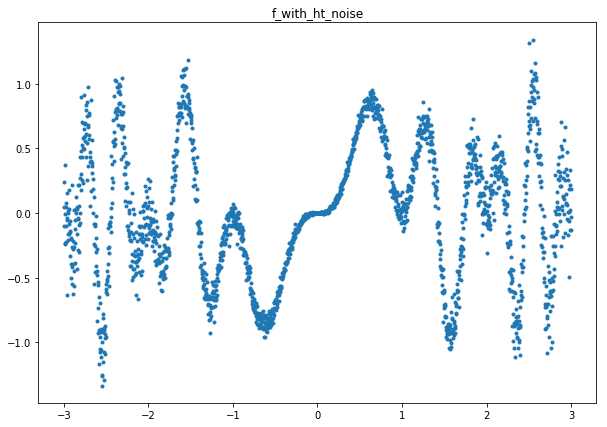

In [30]:
def f_without_noise(X):
    return functionDoESpecial (X, 'michalewicz')
    #second function - without homo noise  
def f_with_hm_noise(X):
    return functionDoESpecial (X, 'michalewicz') + np.random.normal(loc=0.0, scale=0.12, size=(X.shape[0], 1)).reshape (-1, )        
        #third function
def f_with_ht_noise(X):
         #target function  + heteroscadastic noise
    return functionDoESpecial (X, 'michalewicz')  + \
        0.07 * np.random.multivariate_normal(np.zeros(X.reshape(-1, ).shape[0]), np.diag(abs (X.reshape (-1, ))**2), 1)[0]        












N = 2000
X = np.linspace(-3, 3, N).reshape (-1, 1)
V1 = np.array (f_with_hm_noise (X) - f_without_noise (X))
V2 = np.array (f_with_ht_noise (X) - f_without_noise (X))
V1 = V1 **2
V2 = V2 **2

print 'variance_hm = ',  V1.mean()
print 'variance_ht =  ', V2.mean()

y = f_without_noise(X)
pyplot.figure(figsize = (10, 7))
pyplot.title("f_without_noise")
pyplot.plot(X, y, '.')

y = f_with_hm_noise(X)
pyplot.figure(figsize = (10, 7))
pyplot.title("f_with_hm_noise")
pyplot.plot(X, y, '.')
    
y = f_with_ht_noise(X)
pyplot.figure(figsize = (10, 7))
pyplot.title("f_with_ht_noise")
pyplot.plot(X, y, '.')

Минимум данной функции находится в точке $x_\min = -2.54$. Было полученно, что при оптимизации количество попаданий в промежуток (-2.67, -2.42), то есть с точностью  95%, в гомоскедастичной модели составило 7 из 50 (14%) , в гетероскедастичной модели 5 из 50 (10%).  


    Среднее значение и дисперсия целевой функции на точках полученных в результате оптимизации  для двух моделей:
    y_opt_hm_noise
    mean:  -0.8471016757616034 variance:  0.021139821594308668
    y_opt_ht_noise
    mean:  -0.869313405891204 variance:  0.021888113521720896 
    
    Значение целевой функции в минимуме:
    mean:  -0.9729868361206012 


Четвертая функция

variance_hm =  284.9299175873887
variance_ht =   291.5913567845364


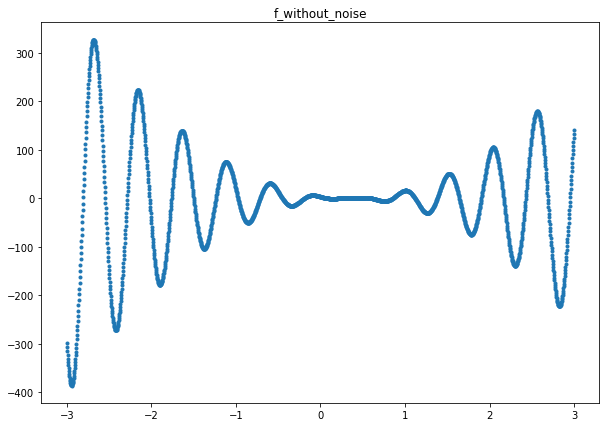

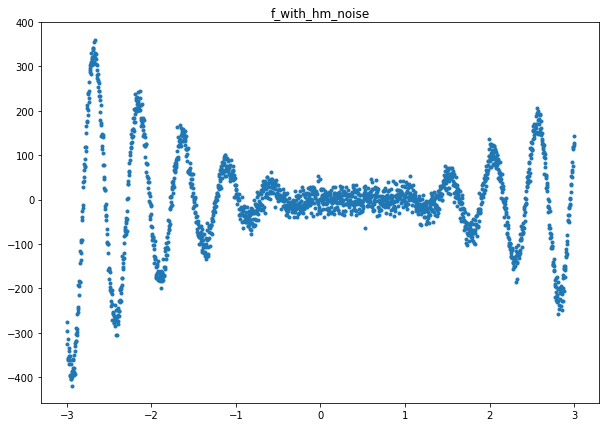

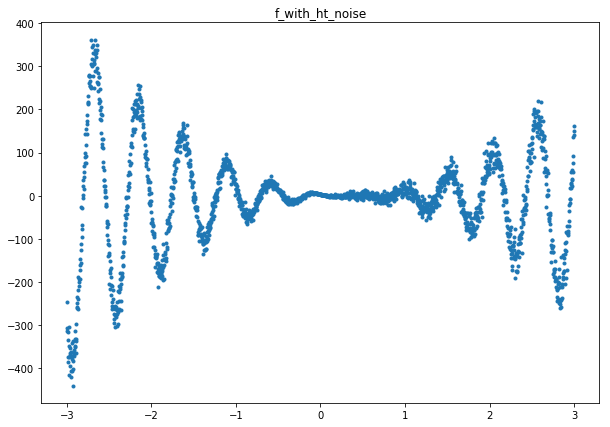

In [31]:
def f (x): 
    return (6 * x - 2) ** 2 * np.sin (12 * x - 4)

def f_without_noise(X):
    return f (X)
    #second function - without homo noise  
def f_with_hm_noise(X):
    return f(X) + np.random.normal(loc=0.0, scale=17, size=(X.shape[0], 1)).reshape (-1, )        
        #third function
def f_with_ht_noise(X):
         #target function  + heteroscadastic noise
    return f (X)  + \
        10 * np.random.multivariate_normal(np.zeros(X.reshape(-1, ).shape[0]), np.diag(abs (X.reshape (-1, ))**2), 1)[0]        

N = 2000
X = np.linspace(-3, 3, N)
V1 = np.array (f_with_hm_noise (X) - f_without_noise (X))
V2 = np.array (f_with_ht_noise (X) - f_without_noise (X))
V1 = V1 **2
V2 = V2 **2

print 'variance_hm = ',  V1.mean()
print 'variance_ht =  ', V2.mean()






y = f_without_noise(X)
pyplot.figure(figsize = (10, 7))
pyplot.title("f_without_noise")
pyplot.plot(X, y, '.')

y = f_with_hm_noise(X)
pyplot.figure(figsize = (10, 7))
pyplot.title("f_with_hm_noise")
pyplot.plot(X, y, '.')
    
y = f_with_ht_noise(X)
pyplot.figure(figsize = (10, 7))
pyplot.title("f_with_ht_noise")
pyplot.plot(X, y, '.')


Минимум данной функции находится в точке $x_\min = -2.94$. Было полученно, что при оптимизации количество попаданий в промежуток (-3.08, -2.79), то есть с точностью  95%, в гомоскедастичной модели составило 36 из 50 (72%) , в гетероскедастичной модели 29 из 50 (58%)

    Среднее значение и дисперсия целевой функции на точках полученных в результате оптимизации  для двух моделей:
    y_with_hm_noise
    mean:  -311.1702084995513 variance:  12255.058187358125
    y_with_ht_noise
    mean:  -299.8329577955623 variance:  9609.222476732142 
    Значение целевой функции в минимуме:
    -385.8511232320801 


Пятая функция

variance_hm =  4.158995647516908
variance_ht =   4.139140454636019


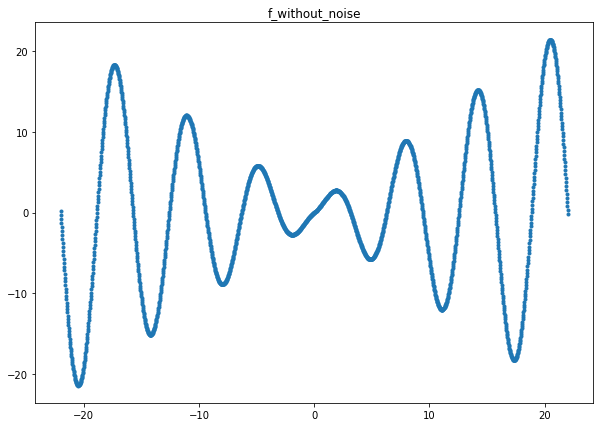

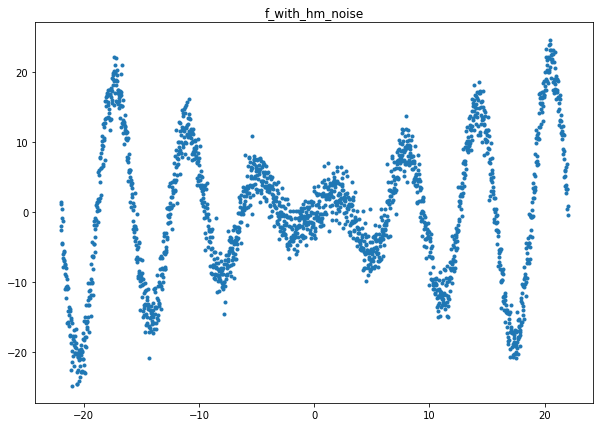

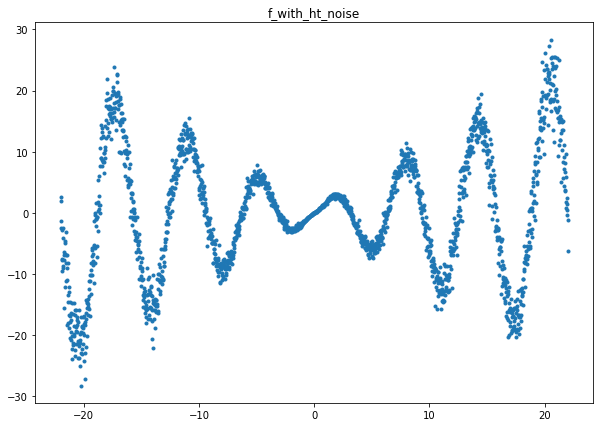

In [34]:
def f_with_hm_noise(X):
     # target function  + homoscadastic noise
    return np.sin (X) * (1 + np.abs (X)) + np.random.normal(loc=0.0, scale=2, size=(X.shape[0], 1)).reshape (-1, )

def f_with_ht_noise(X):
     # target function  + heteroscadastic noise
    return np.sin (X) * (1 + np.abs (X)) + \
        0.16 * np.random.multivariate_normal(np.zeros(X.reshape(-1, ).shape[0]), np.diag(abs (X.reshape (-1, ))**2), 1)[0]

def f_without_noise(X):
    return np.sin (X) * (1 + np.abs (X))

N = 2000
X = np.linspace(-22, 22, N)
V1 = np.array (f_with_hm_noise (X) - f_without_noise (X))
V2 = np.array (f_with_ht_noise (X) - f_without_noise (X))
V1 = V1 **2
V2 = V2 **2

print 'variance_hm = ',  V1.mean()
print 'variance_ht =  ', V2.mean()



y = f_without_noise(X) 
pyplot.figure(figsize = (10, 7))
pyplot.title("f_without_noise")
pyplot.plot(X, y, '.')

y = f_with_hm_noise(X) 
pyplot.figure(figsize = (10, 7))
pyplot.title("f_with_hm_noise")
pyplot.plot(X, y, '.')

y = f_with_ht_noise(X) 
pyplot.figure(figsize = (10, 7))
pyplot.title("f_with_ht_noise")
pyplot.plot(X, y, '.')

Минимум данной функции находится в точке $x_\min = -20.5$. Было полученно, что при оптимизации количество попаданий в промежуток (-21.52, -19.47), то есть с точностью  95%, в гомоскедастичной модели составило 34 из 50 (68%) , в гетероскедастичной модели 28 из 50 (56%)

    Среднее значение и дисперсия целевой функции на точках полученных в результате оптимизации  для двух моделей:
    y_opt_hm_noise
    mean:  -18.656773801740364 variance:  17.006888637665835
    y_opt_ht_noise
    mean:  -18.418774954015024 variance:  9.913431632058238
    Значение целевой функции в минимуме:
    -21.431840576994183
    